In [1]:
import json
from shapely.geometry import LineString
import geopandas as gpd

In [5]:
with open('test_greedy.json', encoding="utf8") as f:
    data = json.load(f)

In [7]:
data.keys()

dict_keys(['Node', 'Way', 'Relation'])

In [8]:
len(data['Way'])

235646

In [10]:
list(data['Way'].values())[0]

{'id': 23009818,
 'tags': {'highway': 'secondary', 'name': 'Jakiri-Foumban', 'ref': 'P20'},
 'refs': [1989405171,
  1989405172,
  1989405173,
  248074314,
  1989405174,
  1989405175,
  248074313,
  1989405176,
  1989405177,
  1989405179,
  1989405181,
  1989405183,
  1989405186,
  1989405188,
  1989405190,
  1989405192,
  248074311,
  7501018136,
  248074310,
  1989405194,
  1989405198,
  1989405200,
  1989405202,
  248074308,
  1989405203,
  1989405204,
  248074299,
  1989405205,
  1989405206,
  1989405207,
  1989405208,
  1989405209,
  1989405212,
  1989405214,
  7248059917,
  1989405216,
  1989405219,
  1989405221,
  248074298,
  1989405223,
  1989405225,
  248074296,
  1989405227,
  248074295,
  1989405235,
  1989405244,
  1989405250,
  1989405252,
  248074294,
  1989405253,
  1989405254,
  248074293,
  1989405257,
  5930684361,
  1989405259,
  1989405260,
  1989405258,
  1989405256,
  1989405255,
  248074291,
  1989405246,
  1989405239,
  1989405237,
  248074290,
  1989405233,
  1

In [11]:
data['Way']['23009818']

{'id': 23009818,
 'tags': {'highway': 'secondary', 'name': 'Jakiri-Foumban', 'ref': 'P20'},
 'refs': [1989405171,
  1989405172,
  1989405173,
  248074314,
  1989405174,
  1989405175,
  248074313,
  1989405176,
  1989405177,
  1989405179,
  1989405181,
  1989405183,
  1989405186,
  1989405188,
  1989405190,
  1989405192,
  248074311,
  7501018136,
  248074310,
  1989405194,
  1989405198,
  1989405200,
  1989405202,
  248074308,
  1989405203,
  1989405204,
  248074299,
  1989405205,
  1989405206,
  1989405207,
  1989405208,
  1989405209,
  1989405212,
  1989405214,
  7248059917,
  1989405216,
  1989405219,
  1989405221,
  248074298,
  1989405223,
  1989405225,
  248074296,
  1989405227,
  248074295,
  1989405235,
  1989405244,
  1989405250,
  1989405252,
  248074294,
  1989405253,
  1989405254,
  248074293,
  1989405257,
  5930684361,
  1989405259,
  1989405260,
  1989405258,
  1989405256,
  1989405255,
  248074291,
  1989405246,
  1989405239,
  1989405237,
  248074290,
  1989405233,
  1

In [16]:
way = data['Way']['23009818']
lonlats = []

for node_id in way['refs']:
    node = data['Node'][str(node_id)]
    lonlats.append(tuple(node['lonlat']))

In [17]:
ls = LineString(lonlats)

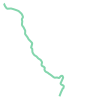

In [18]:
ls

In [22]:
d = {'way_id': [way['id']], 'tags': [way['tags']], 'geometry': [ls]}
df_test = gpd.GeoDataFrame(d)

df_test

,way_id,tags,geometry
0,23009818,"{'highway': 'secondary', 'name': 'Jakiri-Foumb...","LINESTRING (10.68976 5.99850, 10.69012 5.99958..."


In [23]:
type(data['Way'])

dict

In [25]:
d = {'way_id': [], 'tags': [], 'geometry': []}
missing_node_ids = []
total_nodes = 0

for way_id in data['Way']:
    way = data['Way'][way_id]
    lonlats = []
    for node_id in way['refs']:
        total_nodes += 1
        try:
            node = data['Node'][str(node_id)]
            lonlats.append(tuple(node['lonlat']))
        except:
            missing_node_ids.append(node_id)
        
    ls = LineString(lonlats)
    
    d['way_id'].append(way_id)
    d['tags'].append(way['tags'])
    d['geometry'].append(ls)

In [26]:
len(missing_node_ids) / total_nodes

3.846057259648004e-06

In [27]:
total_nodes

4420111

In [28]:
len(missing_node_ids)

17

In [29]:
missing_node_ids

[4041472778,
 4041472776,
 4041472774,
 4041472772,
 4041472771,
 4041472773,
 4041472775,
 4041472777,
 4041472779,
 4041472781,
 4041472783,
 4041472785,
 4041472786,
 4041472784,
 4041472782,
 4041472780,
 4041472778]

In [33]:
df = gpd.GeoDataFrame(d, crs="EPSG:4326")

In [34]:
df.head()

,way_id,tags,geometry
0,23009818,"{'highway': 'secondary', 'name': 'Jakiri-Foumb...","LINESTRING (10.68976 5.99850, 10.69012 5.99958..."
1,23011937,{'highway': 'secondary'},"LINESTRING (10.76359 6.30632, 10.76133 6.30756..."
2,23011938,{'highway': 'secondary'},"LINESTRING (10.79160 6.42639, 10.79141 6.42447..."
3,23011941,"{'highway': 'tertiary', 'note': 'Fix Me'}","LINESTRING (10.68737 6.58365, 10.68739 6.58349..."
4,23018464,{'highway': 'tertiary'},"LINESTRING (10.63607 6.31230, 10.63612 6.31239..."


In [35]:
df.shape

(235646, 3)

In [36]:
df.to_file('test_geojson_greedy.json', driver='GeoJSON')

In [39]:
df.head()

,way_id,tags,geometry
0,23009818,"{'highway': 'secondary', 'name': 'Jakiri-Foumb...","LINESTRING (10.68976 5.99850, 10.69012 5.99958..."
1,23011937,{'highway': 'secondary'},"LINESTRING (10.76359 6.30632, 10.76133 6.30756..."
2,23011938,{'highway': 'secondary'},"LINESTRING (10.79160 6.42639, 10.79141 6.42447..."
3,23011941,"{'highway': 'tertiary', 'note': 'Fix Me'}","LINESTRING (10.68737 6.58365, 10.68739 6.58349..."
4,23018464,{'highway': 'tertiary'},"LINESTRING (10.63607 6.31230, 10.63612 6.31239..."


In [41]:
with open('D:/canopy_data/OSM/jsons/cameroon_waterway.json', encoding="utf8") as f:
    data = json.load(f)
    
d = {'way_id': [], 'tags': [], 'geometry': []}
missing_node_ids = []
total_nodes = 0

for way_id in data['Way']:
    way = data['Way'][way_id]
    lonlats = []
    for node_id in way['refs']:
        total_nodes += 1
        try:
            node = data['Node'][str(node_id)]
            lonlats.append(tuple(node['lonlat']))
        except:
            missing_node_ids.append(node_id)
        
    ls = LineString(lonlats)
    
    d['way_id'].append(way_id)
    d['tags'].append(way['tags'])
    d['geometry'].append(ls)

In [42]:
len(missing_node_ids)

107

In [43]:
total_nodes

1166524

In [44]:
len(d['way_id'])

25945

In [45]:
df_test = df.copy()

df2 = gpd.GeoDataFrame(d, crs="EPSG:4326")

df_test = df_test.append(df2)

df_test.shape

(261591, 3)

In [46]:
len(df_test) - len(df)

25945

In [47]:
df_test.tail()

,way_id,tags,geometry
25940,953583911,{'waterway': 'river'},"LINESTRING (14.50841 7.19205, 14.50827 7.19202..."
25941,953583912,{'waterway': 'river'},"LINESTRING (14.49926 7.19293, 14.49920 7.19298..."
25942,953583913,{'waterway': 'river'},"LINESTRING (14.49544 7.19703, 14.49535 7.19707..."
25943,953638786,{'waterway': 'stream'},"LINESTRING (9.73366 4.06308, 9.73369 4.06307)"
25944,953638787,"{'layer': '-1', 'tunnel': 'culvert', 'waterway...","LINESTRING (9.73359 4.06312, 9.73366 4.06308)"


In [38]:
import glob


glob.glob('D:/canopy_data/OSM/jsons/*.json')

['D:/canopy_data/OSM/jsons\\cameroon_highway.json',
 'D:/canopy_data/OSM/jsons\\cameroon_landuse.json',
 'D:/canopy_data/OSM/jsons\\cameroon_waterway.json',
 'D:/canopy_data/OSM/jsons\\central-african-republic_highway.json',
 'D:/canopy_data/OSM/jsons\\central-african-republic_landuse.json',
 'D:/canopy_data/OSM/jsons\\central-african-republic_waterway.json',
 'D:/canopy_data/OSM/jsons\\congo-brazzaville_highway.json',
 'D:/canopy_data/OSM/jsons\\congo-brazzaville_landuse.json',
 'D:/canopy_data/OSM/jsons\\congo-brazzaville_waterway.json',
 'D:/canopy_data/OSM/jsons\\congo-democratic-republic_highway.json',
 'D:/canopy_data/OSM/jsons\\congo-democratic-republic_landuse.json',
 'D:/canopy_data/OSM/jsons\\congo-democratic-republic_waterway.json',
 'D:/canopy_data/OSM/jsons\\equatorial-guinea_highway.json',
 'D:/canopy_data/OSM/jsons\\equatorial-guinea_landuse.json',
 'D:/canopy_data/OSM/jsons\\equatorial-guinea_waterway.json',
 'D:/canopy_data/OSM/jsons\\gabon_highway.json',
 'D:/canopy_d

In [25]:
def extract_geojson_info(json_locs, geojson_loc=None):
    
    total_nodes = 0
    missing_node_ids = []
    
    for i, json_loc in enumerate(json_locs):
        print('Extracting json', json_loc)
        
        with open(json_loc, encoding="utf8") as f:
            data = json.load(f)
        
        d = {'way_id': [], 'tags': [], 'geometry': []}

        for way_id in data['Way']:
            way = data['Way'][way_id]
            lonlats = []
            for node_id in way['refs']:
                total_nodes += 1
                try:
                    node = data['Node'][str(node_id)]
                    lonlats.append(tuple(node['lonlat']))
                except:
                    missing_node_ids.append(node_id)

            if len(lonlats) > 1:
                ls = LineString(lonlats)

                d['way_id'].append(way_id)
                d['tags'].append(way['tags'])
                d['geometry'].append(ls)
            else:
                continue
        
        if i == 0:
            gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")
        else:
            temp = gpd.GeoDataFrame(d, crs="EPSG:4326")
            gdf = gdf.append(temp)
            
    if geojson_loc:
        gdf.to_file(geojson_loc, driver='GeoJSON')
        
    return gdf, missing_node_ids, total_nodes

In [26]:
import glob


json_locs = glob.glob('D:/canopy_data/OSM/jsons/*.json')

#with open(json_locs[0], encoding="utf8") as f:
#    data = json.load(f)
    
#data.keys()

In [27]:
geojson_loc = 'D:/canopy_data/OSM/relevant_osm_info.json'

gdf, missing_node_ids, total_nodes = extract_geojson_info(json_locs, geojson_loc)

print('Finished')

Extracting json D:/canopy_data/OSM/jsons\cameroon_highway.json
Extracting json D:/canopy_data/OSM/jsons\cameroon_landuse.json
Extracting json D:/canopy_data/OSM/jsons\cameroon_waterway.json
Extracting json D:/canopy_data/OSM/jsons\central-african-republic_highway.json
Extracting json D:/canopy_data/OSM/jsons\central-african-republic_landuse.json
Extracting json D:/canopy_data/OSM/jsons\central-african-republic_waterway.json
Extracting json D:/canopy_data/OSM/jsons\congo-brazzaville_highway.json
Extracting json D:/canopy_data/OSM/jsons\congo-brazzaville_landuse.json
Extracting json D:/canopy_data/OSM/jsons\congo-brazzaville_waterway.json
Extracting json D:/canopy_data/OSM/jsons\congo-democratic-republic_highway.json
Extracting json D:/canopy_data/OSM/jsons\congo-democratic-republic_landuse.json
Extracting json D:/canopy_data/OSM/jsons\congo-democratic-republic_waterway.json
Extracting json D:/canopy_data/OSM/jsons\equatorial-guinea_highway.json
Extracting json D:/canopy_data/OSM/jsons\e

In [29]:
len(missing_node_ids)

68438

In [30]:
total_nodes

37919575

In [31]:
(len(missing_node_ids) / total_nodes) * 100

0.18048198061291562

In [10]:
with open('D:/canopy_data/OSM/jsons\congo-democratic-republic_highway.json', encoding="utf8") as f:
    data = json.load(f)
    
data['Way']

{'4392435': {'id': 4392435,
  'tags': {'highway': 'trunk',
   'lanes': '3',
   'name': 'Avenue Sendwe',
   'oneway': 'yes'},
  'refs': [4039610485,
   436093244,
   436080811,
   5559638510,
   26835771,
   29862641,
   620781984,
   26835765,
   26971945]},
 '4394364': {'id': 4394364,
  'tags': {'highway': 'trunk',
   'junction': 'roundabout',
   'name': 'Rond-Point Ngaba',
   'oneway': 'yes',
   'ref': 'RN1',
   'source': 'Cellule Infrastructure',
   'source:date': '2018/09/18'},
  'refs': [6788555618,
   26853492,
   4218319462,
   4218319461,
   4218319457,
   4218319455,
   4218319454,
   26853493,
   6788555619,
   4218319451,
   4218319450,
   4218319452,
   4218319453,
   26853494,
   4218319456,
   4218319458,
   4218319459,
   26853495,
   26853496,
   4218319465]},
 '4400935': {'id': 4400935,
  'tags': {'fixme': 'name',
   'highway': 'trunk',
   'name': 'Avenue By Pass',
   'note': 'By pass',
   'ref': 'RN1',
   'source': 'Cellule Infrastructure',
   'source:date': '2018/09/

In [11]:
data['Node']['4039610485']

{'id': 4039610485,
 'tags': {},
 'lonlat': [15.320559899999981, -4.334382299999999]}

In [19]:
for way_id in data['Way']:
    try:
        way = data['Way'][way_id]
        lonlats = []
        for node_id in way['refs']:
            try:
                node = data['Node'][str(node_id)]
                lonlats.append(tuple(node['lonlat']))
            except:
                continue
                
        ls = LineString(lonlats)
    except:
        print(way_id)

382148689
382451194
382451203
382451204
382451212
382463979
382464000
383811961
435345091
435451137
435487271
435645337
435818695
435956935


Exception ignored in: <function BaseGeometry.__del__ at 0x0000026710CDFDC0>
Traceback (most recent call last):
  File "C:\Anaconda3\envs\canopy_conda\lib\site-packages\shapely\geometry\base.py", line 242, in __del__
    self.empty(val=None)
  File "C:\Anaconda3\envs\canopy_conda\lib\site-packages\shapely\geometry\base.py", line 227, in empty
    self._lgeos.GEOSGeom_destroy(self.__geom__)
KeyboardInterrupt: 


In [20]:
way = data['Way']['382148689']

In [21]:
way

{'id': 382148689,
 'tags': {'leisure': 'pitch'},
 'refs': [3853474722, 3853474723, 3853474724, 3853474725, 3853474722]}

In [22]:
lonlats = []
for node_id in way['refs']:
    try:
        node = data['Node'][str(node_id)]
        lonlats.append(tuple(node['lonlat']))
    except:
        continue

In [23]:
lonlats

[(19.46752649999999, -2.0461380999999874)]

In [24]:
ls = LineString(lonlats)

ValueError: LineStrings must have at least 2 coordinate tuples